# Quantum Fourier Transform

The QFT is just the quantum equivalent of the discrete Fourier transform (DFT), defined as the transformation from vector $(x_0, \dots, x_{N-1})$ to vector $(y_0, \dots, y_{N-1})$ such that:

$$
y_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} x_j \, \omega_N^{j\, k}
$$

where $\omega_N = e^{\frac{2 \pi i}{N}}$ is the N-th complex root of unity.

Similarly, the QFT is just a DFT between wavefunction amplitudes. It acts on state $\sum_{j=0}^{N-1} |x_i \rangle$ and transforms it to $\sum_{j=0} y_j |j\rangle$ where $y_k$ is given by the DFT of the x's amplitudes. If we consider an orthonormal basis $\{|0\rangle, \dots, |N-1\rangle\}$, the QFT can also be defined as the basis transformation
$$
|j\rangle \rightarrow \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \omega_{N}^{j k} |k\rangle
$$

or similarly by the unitary

$$
U_{QFT} = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} \sum_{k=0}^{N-1} \omega_{N}^{j k} |j\rangle \langle k|
$$

Notice that the Hadamard is $U_{QFT}$ for $N=2$ (1 qubit) and transforms the Z basis into the X basis, infact

$$
\begin{aligned}
U_{QFT}(N=2) &= \frac{1}{\sqrt{2}} \sum_{x=0}^{1} \sum_{y=0}^{1} \omega_{N}^{x y} |y\rangle \langle x|\\
&= \frac{1}{\sqrt{2}} \Big[|0\rangle+|1\rangle\Big] \langle 0| + \frac{1}{\sqrt{2}} \Big[|0\rangle-|1\rangle\Big] \langle 1|\\
&= |+\rangle \langle 0| + |-\rangle \langle 1| \equiv H
\end{aligned}
$$

The QFT in general transforms the computational Z basis into the Fourier basis.

Now let's try to derive a more useful form for it for the general case of n qubits. In this case, cosnider $N=2^n$ and the computational basis is given by states like $|x\rangle=|x_1,\dots, x_n\rangle$, so

$$
\begin{aligned}
U_{QFT_N} |x\rangle &= \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \omega_N^{x \, y} |y\rangle\\
&= \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \, \pi \, i \frac{x \, y}{2^n}} |y\rangle
\end{aligned}
$$

Now notice that $y=y_1\,y_2\, \dots \, y_n$ and $\frac{y}{2^n}=0.y_1 \dots y_n$ which in decimal form is given by $\frac{y}{2^n}=\sum_{y=1}^{n} \frac{y_k}{2^k}$, hence

$$
\begin{aligned}
U_{QFT_N} |x\rangle &= \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \, \pi \, i \frac{x \, y}{2^n}} |y\rangle\\
&= \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \, \pi \, i x \, \sum_{k=1}^n \frac{y_k}{2^k}} |y_1 \dots y_n \rangle\\
&= \frac{1}{\sqrt{N}} \sum_{y_1=0}^{1} \dots \sum_{y_n=0}^{1} \prod_{k=1}^n e^{2 \, \pi \, i x \, \frac{y_k}{2^k}} |y_1 \dots y_n \rangle\\
&= \frac{1}{\sqrt{N}} \bigotimes_{k=1}^n \big(|0\rangle + e^{\frac{2 \, \pi \, i x}{2^k}} |1\rangle \big)\\
&= \frac{1}{\sqrt{N}} \big(|0\rangle + e^{\frac{2 \, \pi \, i x}{2}} |1\rangle \big) \otimes \big(|0\rangle + e^{\frac{2 \, \pi \, i x}{2^2}} |1\rangle \big) \otimes \dots \otimes \big(|0\rangle + e^{\frac{2 \, \pi \, i x}{2^n}} |1\rangle \big)  
\end{aligned}
$$

Finally, remember that the $R_\phi$ gate rotates a qubit around the Z axis and is given by

$$
R_\phi =
\begin{bmatrix}
1 & 0 \\
0 & e^{i \, \phi}
\end{bmatrix} = (|0\rangle \langle 0| + e^{\phi \, i} |1\rangle \langle 1|)
$$

which means that each qubit in the fourier basis is given by a $|+\rangle = \frac{1}{\sqrt{2}} \big(|0\rangle + |1\rangle \big)$ state rotated around the Z axis based on the value of $x$ and its position, with the leftmost (most significant) qubits moving more per increment. For example, the animation below shows this for 4 qubits, with $N=16$ (the numbers are just the fourier transform of the corresponding basis vector in the Z basis)

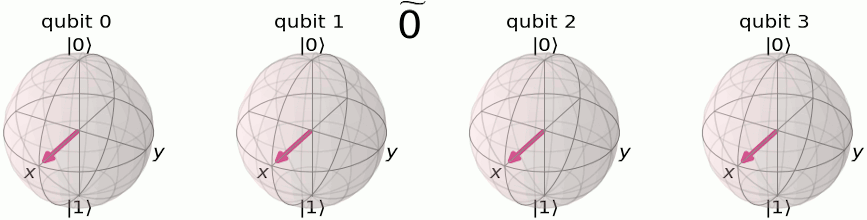

Intuitively, we have that $|\tilde{0}\rangle = |+ \dots +\rangle$ and for further basis states the k-th qubit is rotated by $x/2^{k}$ (where $x$ is the number corresponding to the basis state) times a full turn, i.e. is a fraction $x/2^{k-1}$ of a full rotation.

## Circuit Implementation

To implement the QFT we'll use two gates, H and a new gate. We already know that

$$
H |x_k\rangle = \frac{1}{\sqrt{2}} \big( |0\rangle + e^{\pi i x_k} |1\rangle\big)
$$

where $x_k \in \{0,1\}$. The other gate is a two qubit gate which implements a controlled rotation $CROT_k$, given by

$$
CROT_k = 
\begin{bmatrix}
1 & 0\\
0 & R_k
\end{bmatrix}
$$

where

$$
R_k = R_{\frac{2 \pi}{2^k}} = 
\begin{bmatrix}
1 & 0\\
0 & e^{\frac{2 \pi i}{2^k}}
\end{bmatrix}
$$

which is just the $R_\phi$ rotation gate considered above, conditioned on $x_k=1$ (notice the x factor in the equation from the previous chapter, rotations happen only for x_k=1). The action of this gate on two qubits is

$$
CROT_k |0 x_j\rangle = |0 x_j\rangle\\
CROT_k |1 x_j\rangle = |1 \, R_k x_j\rangle = e^{\frac{2 \pi i}{2^k} x_j} |1 x_j\rangle\\
$$

For the general case of n qubits, the circuit that implements the QFT is as follows, starting from $|x_1\dots x_n\rangle$:

1. H on qubit
on qubit
$$
H_1 |x_1 x_2 \dots x_n\rangle = \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2} x_1}|1\rangle\bigg] \otimes |x_2 \dots x_n\rangle
$$

2. We apply then the series of gates $UROT_2 \dots UROT_n$ conditioned on qubit 2 to n and targeted at qubits 1, obtaining
$$
UROT_2 H_1 |x\rangle = \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^{2}}x_2 + \frac{2 \pi i}{2} x_1}|1\rangle\bigg] \otimes |x_2 \dots x_n\rangle
$$
$$
UROT_n \dots UROT_2 H_1 |x\rangle = \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^{n}}x_n + \dots + \frac{2 \pi i}{2^{2}}x_2 + \frac{2 \pi i}{2} x_1}|1\rangle\bigg] \otimes |x_2 \dots x_n\rangle
$$
Note that $x = 2^{n-1}x_1 + \dots + 2^{0} x_n$, then

$$
UROT_n \dots UROT_2 H_1 |x\rangle = \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^{n}} x}|1\rangle\bigg] \otimes |x_2 \dots x_n\rangle
$$

3. We then apply a similar sequence of gates, with the only difference that each succesive qubits will have one less gate since it will be conditioned only on the less significant qubits (i.e. qubit 2 will be conditioned on 3 to n). At the end we'll have the state

$$
\frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^{n}} x} |1\rangle\bigg] \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^{n-1}} x} |1\rangle\bigg] \otimes \dots \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2} x} |1\rangle\bigg] 
$$

This is what we expected with the difference that the qubit order is reversed, if necessary a sequence of $\frac{n}{2}$ SWAP gates can be applied.

### Example: 3 qubit QFT

Let's see the QFT circuit for 3 qubits states $|y_3 y_2 y_1\rangle = QFT_8 |x_3 x_2 x_1\rangle$.

$$
|x_3 x_2\rangle \otimes H |x_1\rangle = |\psi_1\rangle = |x_3 x_2\rangle \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2} x_1}|1\rangle\bigg]
$$

Apply now a $UROT_2$ gate on 1 depending on 2

$$
|\psi_2\rangle = UROT_2 |\psi_1\rangle = |x_3 x_2\rangle \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^2} x_2 + \frac{2 \pi i}{2} x_1}|1\rangle\bigg] 
$$

Apply $UROT_3$

$$
|\psi_3\rangle = UROT_3 |\psi_2\rangle = |x_3 x_2\rangle \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^3} x_3 + \frac{2 \pi i}{2^2} x_2 + \frac{2 \pi i}{2} x_1}|1\rangle\bigg] 
$$

Now apply H and $UROT_2$ on qubit 2 depending on qubit 3

$$
\begin{aligned} 
|\psi_4\rangle &= |x_3\rangle \otimes UROT_3 \, H x_2\rangle \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^3} x_3 + \frac{2 \pi i}{2^2} x_2 + \frac{2 \pi i}{2} x_1}|1\rangle\bigg]\\ 
&=|x_3\rangle \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^2} x_3 + \frac{2 \pi i}{2} x_2}|1\rangle\bigg] \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^3} x_3 + \frac{2 \pi i}{2^2} x_2 + \frac{2 \pi i}{2} x_1}|1\rangle\bigg]
\end{aligned}
$$

Last, apply H on qubit 3

$$
\begin{aligned} 
|\psi_5\rangle &= H |x_3\rangle \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^2} x_3 + \frac{2 \pi i}{2} x_2}|1\rangle\bigg] \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^3} x_3 + \frac{2 \pi i}{2^2} x_2 + \frac{2 \pi i}{2} x_1}|1\rangle\bigg]\\
&= \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2} x_3}|1\rangle\bigg] \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^2} x_3 + \frac{2 \pi i}{2} x_2}|1\rangle\bigg] \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^3} x_3 + \frac{2 \pi i}{2^2} x_2 + \frac{2 \pi i}{2} x_1}|1\rangle\bigg]
\end{aligned}
$$

which moving around the terms and adding the missing ones for each qubit, can at last be rewritten as

$$
\begin{aligned} 
|\psi_5\rangle =& \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2} x}|1\rangle\bigg] \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^2} x}|1\rangle\bigg] \otimes \frac{1}{\sqrt{2}} \bigg[ |0\rangle + e^{\frac{2 \pi i}{2^3} x}|1\rangle\bigg]
\end{aligned}
$$

which is as expected the output of the QFT with the qubits swapped. We must SWAP $y_1$ with $y_3$ to obtain the final state of QFT.

Notice that only the last qubit depends on all the others, with further qubits depending on fewer and fewer qubits. Moreover, as QFT circuits become large rotation angles become smaller and smaller, and thus we can ignore angles below a certain threshold to obtain decent results. This is called approximate QFT.

# Qiskit implementation

We need to know how to implement the $CROT_k$ operation in qiskit, it is a controlled phase rotation gate. We already saw it is basically a controlled $R_\phi$ gate which can thus be written as

$$
C U_1 (\phi) = 
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i \phi}
\end{bmatrix}
$$

hence the $CROT_k$ will just be $CU_1(\pi/2^{k-1})$

### 3 qubits

Let's first code the example we saw on 3 qubits. 

In [4]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [2]:
qc_QFT = QuantumCircuit(3)

Since the qiskit notation uses the index 0 for the least significant bit (opposite to what we saw above), the resulting cicuit will be flipped on the horizontal respect to the one above, i.e. qubit 2 will be the one to depend on all the others etc. Thus, we start by applying the $H$ and $UROT_2, UROT_3$ to the qubit 2

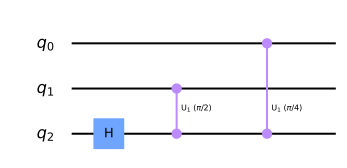

In [3]:
qc_QFT.h(2)
qc_QFT.cu1(pi/2, 1, 2) #CROT from 1 to 2
qc_QFT.cu1(pi/4, 0, 2) #CROT from 0 (least significant) to 2
qc_QFT.draw()

We now repeat the process for the qubit 1

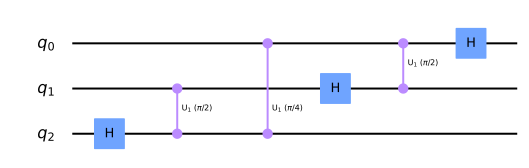

In [4]:
qc_QFT.h(1)
qc_QFT.cu1(pi/2, 0, 1)
qc_QFT.h(0)
qc_QFT.draw()

And finally we must SWAP the qubits 0 and 2 to get the QFT

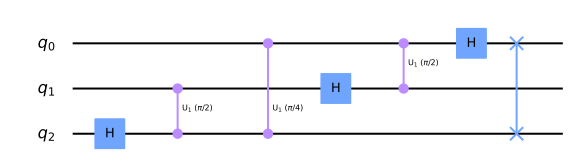

In [5]:
qc_QFT.swap(0,2)
qc_QFT.draw()

### General QFT circuit

We can now create a more general circuit. First we make a function to correctly rotate the qubits

In [1]:
def qft_rotations(circuit, n):
    if n==0:
        return circuit
    n -= 1 #index start from 0
    circuit.h(n) #apply H gate to the current most significant qubit
    for qubit in range(n-1,-1,-1): #goes from n-1 to 0, i inverted it respect to the book so that the gates are applied in order
        # For each less significant qubit, apply a smaller angled rotation 
        # if it is 1
        circuit.cu1(pi/(2**(n-qubit)), qubit, n)

In [2]:
test = QuantumCircuit(4)
qft_rotations(test, 4)
test.draw()

NameError: name 'QuantumCircuit' is not defined

In [3]:
from qiskit_textbook.widgets import scalable_circuit
scalable_circuit(qft_rotations)

NameError: name 'pi' is not defined

Instead of writing code to deal with every qubit after the most significant one, we can rewrite the function above to recursively run on every qubit less than the first provided

In [5]:
def qft_rotations(circuit, n):
    """Performs qft recursively starting from the n-th qubit down to the least significant qubit with n=0"""
    if n==0:
        return circuit
    n -= 1 #index start from 0
    circuit.h(n) #apply H gate to the current most significant qubit
    for qubit in range(n-1,-1,-1): #goes from n-1 to 0, i inverted it respect to the book so that the gates are applied in order
        # For each less significant qubit, apply a smaller angled rotation 
        # if it is 1
        circuit.cu1(pi/(2**(n-qubit)), qubit, n)
    # At the end, we call the same function on the next qubit
    circuit.barrier()
    qft_rotations(circuit, n)

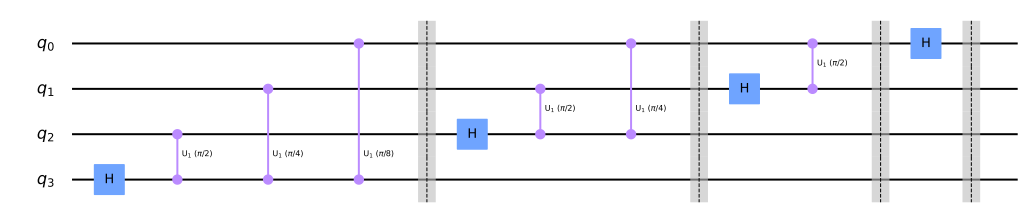

In [6]:
test = QuantumCircuit(4)
qft_rotations(test, 4)
test.draw()

In [7]:
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05@\x00\x00\x01\x08\x08\x06\x00\x00\x00\x9eB^)\x00\…

We almost finished, we just need to swap the final state to get the correct QFT output and combine everything into a final function

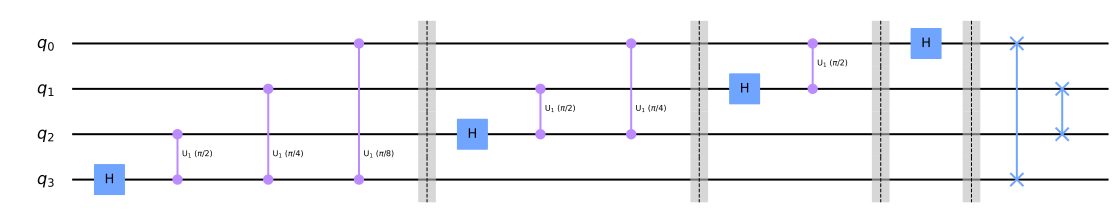

In [8]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

test = QuantumCircuit(4)
qft(test, 4)
test.draw()

In [13]:
scalable_circuit(qft)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xb9\x00\x00\x01\x08\x08\x06\x00\x00\x00r\x1b\xf9…

To test it, consider that $5=101$ in binary, let's encode it into our qubits

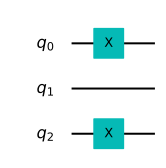

In [14]:
qc = QuantumCircuit(3)

qc.x(0)
qc.x(2)
qc.draw()

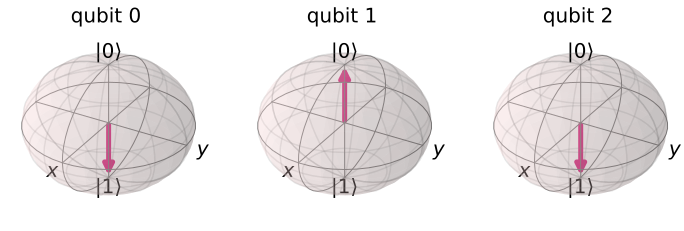

In [15]:
statevector_backend = Aer.get_backend('statevector_simulator')
state = execute(qc, statevector_backend).result().get_statevector()
plot_bloch_multivector(state)

Let's now use QFT on this initial state

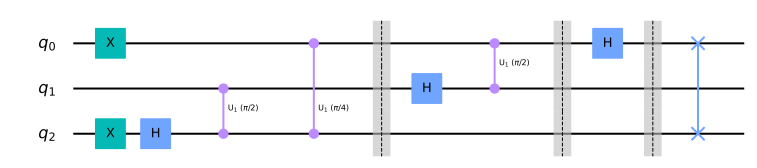

In [16]:
qft(qc, 3)
qc.draw()

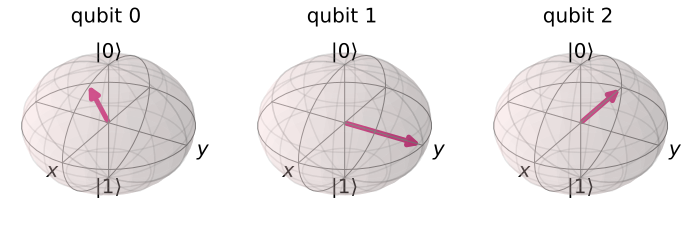

In [17]:
state_qft = execute(qc, statevector_backend).result().get_statevector()
plot_bloch_multivector(state_qft)

The rotations are correct: q2 starts in 1, becomes $|-\rangle$ and then is rotated an eighth of rotation due to q0 being 1. It thus rotated $5/8$ compared to what would be in $|\tilde{0}\rangle$ as expected, and so on.

## Real device

We cannot check the states on a real device, thus we must invert the qft transform and check whether we get the same state.

In [9]:
def inverse_qft(circuit, n):
    """Does the inverse of qft on the first n qubits in circuit"""
    #We create a dummy QC which applies QFT
    qft_circ = qft(QuantumCircuit(n),n)
    # Then we invert the circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() #decompose allows us to see the individual gates 

Let's see the output for $|\tilde{5}\rangle$

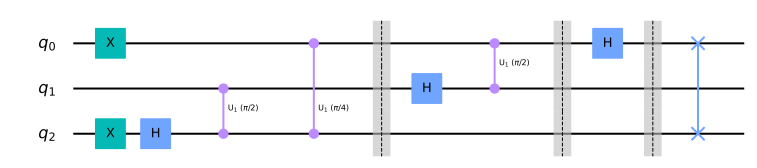

In [10]:
nqubits = 3
number = 5
n_bin = bin(number).replace('0b','')

qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    if n_bin[qubit]=='1':
        qc.x(qubit)
qft(qc, nqubits)
qc.draw()

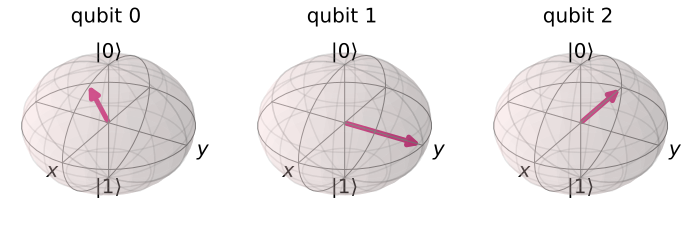

In [20]:
state = execute(qc, statevector_backend).result().get_statevector()
plot_bloch_multivector(state)

Thus we have the correct state, now apply the inverse and measure

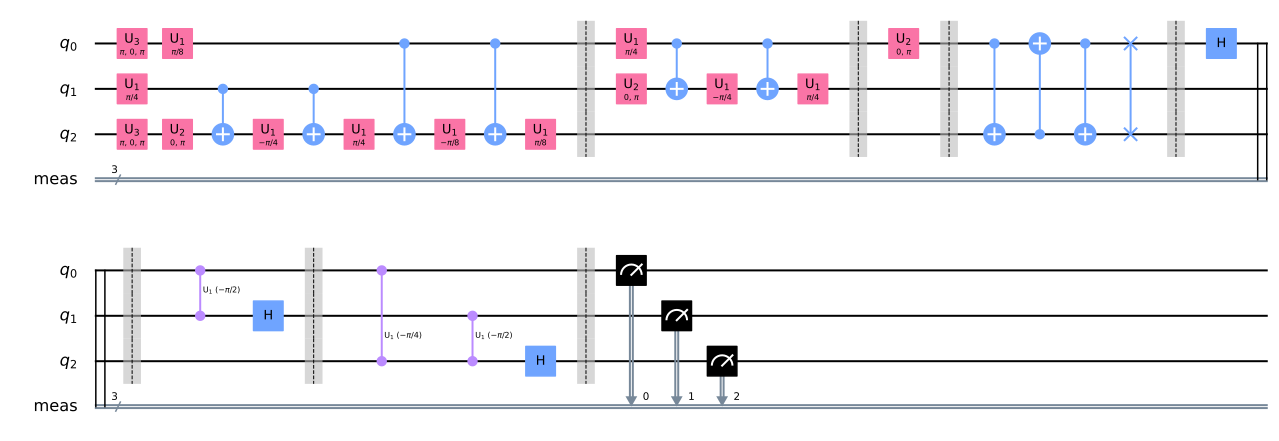

In [11]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()

Notice that in the circuit above the first part until the SWAP is our direct QFT circuit compiled into more basic U3 and U1 gates to be run on the hardware. the last part is actually our QFT inverted.

In [22]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

/home/luigi/.venvs/qiskit-textbook/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [23]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend, " Qubits: ", backend.configuration().n_qubits)

least busy backend:  ibmq_santiago  Qubits:  5


In [24]:
shots = 2048
job = execute(qc, backend=backend, shots=shots, optimization_level=3)
job_monitor(job)

Job Status: job has successfully run


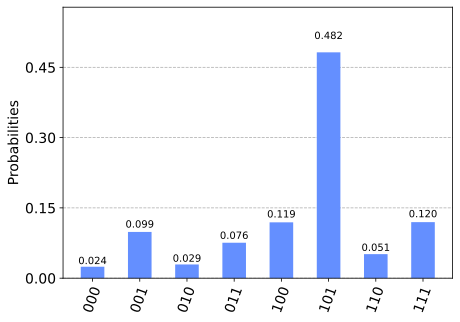

In [25]:
counts = job.result().get_counts()
plot_histogram(counts)

### Exercises

#### 1. Find state in fourier basis s.t. $QFT^{\dagger}|a\rangle=|100\rangle$

Using the interpretation seen above, we can create any simple fourier state by avoiding the QFT and just rotating the state $|\tilde{0}\rangle=|+ \dots +\rangle$. To create the state corresponding to $|100\rangle$ (i.e. $x=4$), we first apply $H$ and then a $U1(\phi)$ rotation to each qubit, where the $\phi$ will be given by $x*\pi/2^{k-1}$ (es. for $x=5$, the q0 was rotate by $5/8$ of a full turn, or $5\pi/4$). 

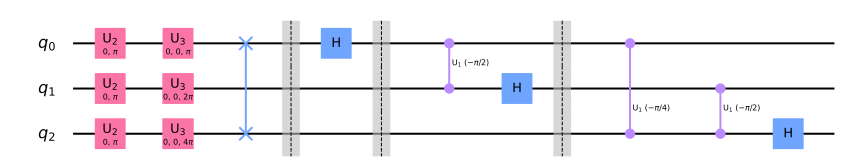

In [26]:
qc_T = QuantumCircuit(3)
for i in range(3):
    qc_T.h(i)
qc_T.u1(pi, 0)
qc_T.u1(2*pi, 1)
qc_T.u1(4*pi, 2)
qc_T = inverse_qft(qc_T, 3)
qc_T.draw()

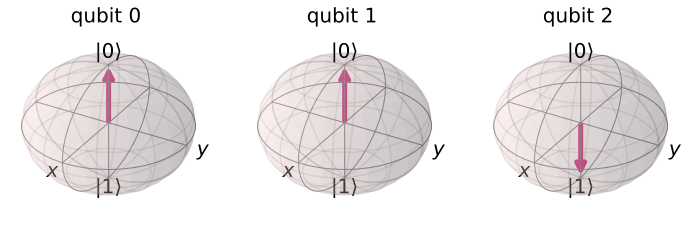

In [27]:
state = execute(qc_T, statevector_backend).result().get_statevector()
plot_bloch_multivector(state)

The final state after the inverse QFT is 100 as expected.

#### 2. Find state in fourier basis s.t. $QFT^{\dagger}|b\rangle=|011\rangle$

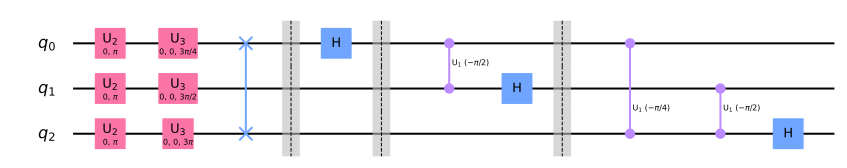

In [28]:
qc_T = QuantumCircuit(3)
for i in range(3):
    qc_T.h(i)
qc_T.u1(3*pi/4, 0)
qc_T.u1(3*pi/2, 1)
qc_T.u1(3*pi, 2)
qc_T = inverse_qft(qc_T, 3)
qc_T.draw()

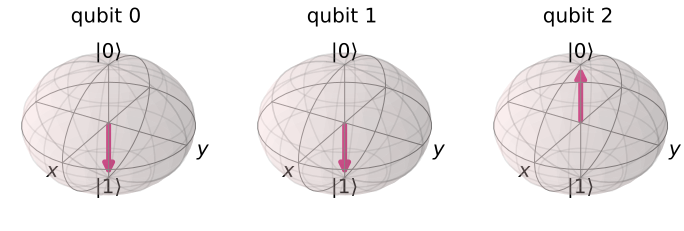

In [29]:
state = execute(qc_T, statevector_backend).result().get_statevector()
plot_bloch_multivector(state)

The final state after the inverse QFT is 011 as expected.